In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
# caminho da pasta
path = 'D:/Users/NKings/Documents/PUC/Mestrado/Base/'

# dado
path_corte = path + "corte_255_901.npy"

# carregando os dados
corte_seismic = np.load(path_corte)

# exibindo shape dos dados
print('Corte seismic: ', corte_seismic.shape)

Corte seismic:  (255, 901)


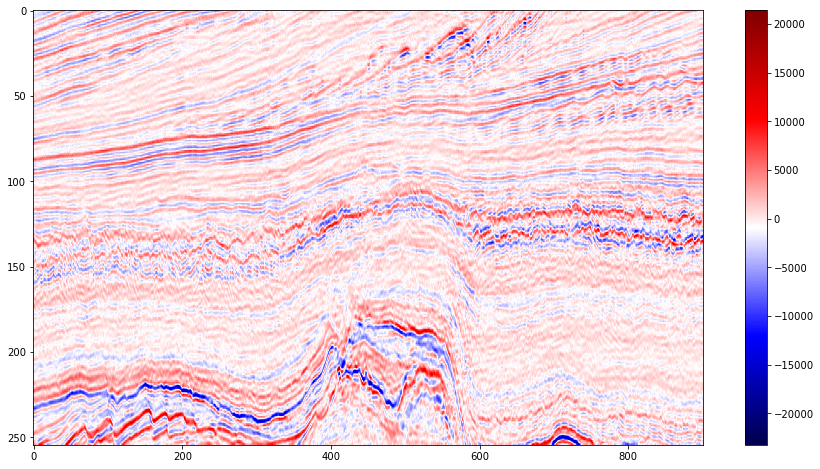

In [15]:
# Plotando o corte original
plt.figure(figsize=(15,8))
plt.imshow(corte_seismic, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

# Normalizando o corte

In [8]:
# Normalização tipo 1

sc = MinMaxScaler(feature_range = (-1, 1))

sc.fit(corte_seismic)

norm_seismic_tipo1 = sc.transform(corte_seismic)

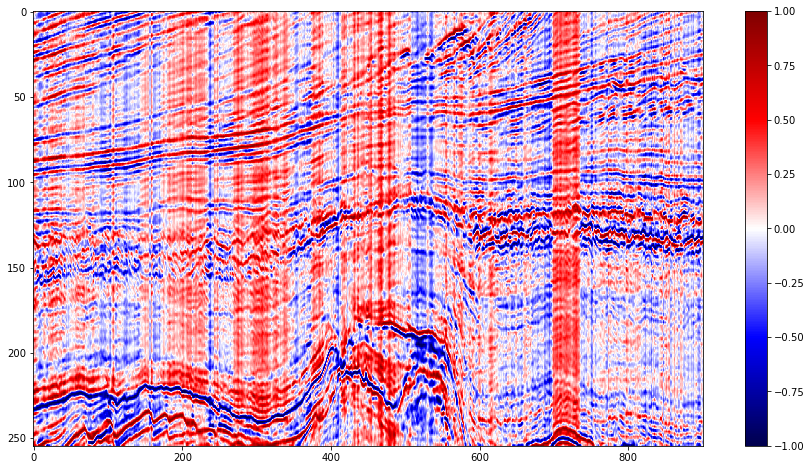

In [9]:
# Plotando a normalização tipo 1
plt.figure(figsize=(15,8))
plt.imshow(norm_seismic_tipo1, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

In [10]:
# Normalização tipo 2

p1, p99 = np.percentile(corte_seismic, (1, 99))

fator = max(abs(p1),abs(p99))

norm_seismic_tipo2 = corte_seismic/fator

norm_seismic_tipo2 = np.clip(norm_seismic_tipo2, -1, 1)

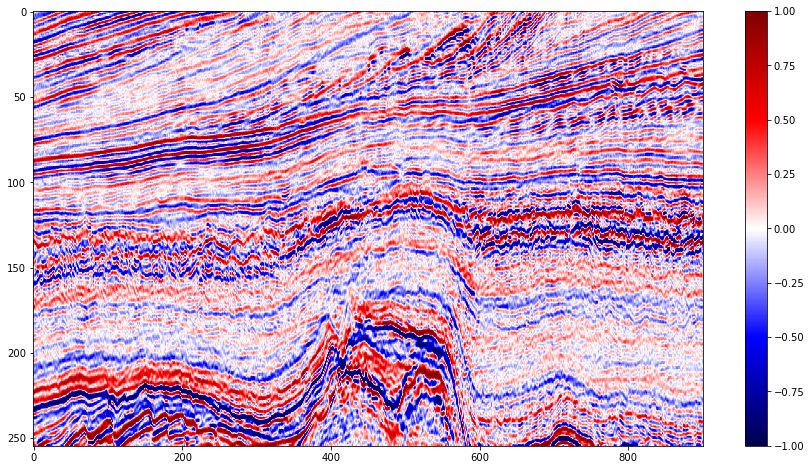

In [13]:
# Plotando a normalização tipo 2
plt.figure(figsize=(15,8))
plt.imshow(norm_seismic_tipo2, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

In [12]:
# Normalização tipo 3

norm_seismic_tipo3 = 2 * ((corte_seismic - np.min(corte_seismic)) / (np.max(corte_seismic) - np.min(corte_seismic))) - 1

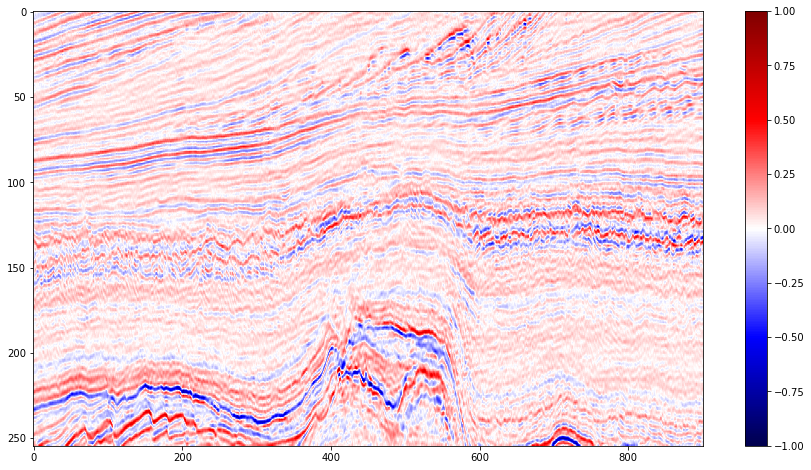

In [14]:
# Plotando a normalização tipo 3
plt.figure(figsize=(15,8))
plt.imshow(norm_seismic_tipo3, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

# Comparando os Resultados Normalizados

In [16]:
# Carregando os dados originais do artigo

# caminho dos dados do artigo
path_volume = path + "volume/seismic_entire_volume.npy"
path_volume_label = path + "volume/labels_entire_volume.npy"

# carregando os dados
volume_seismic = np.load(path_volume)
volume_seismic_label = np.load(path_volume_label)

# exibindo shape dos dados
print('Volume: ', volume_seismic.shape)
print('Volume labels: ', volume_seismic_label.shape)

Volume:  (601, 901, 255)
Volume labels:  (601, 901, 255)


In [17]:
# obtendo apenas uma inline do volume de dados
inline_vol = volume_seismic[325:326,:,:]
print(inline_vol.shape)

# dando um novo shape para o array inline_vol
inline_vol = inline_vol.reshape(901,255).T
print(inline_vol.shape)

(1, 901, 255)
(255, 901)


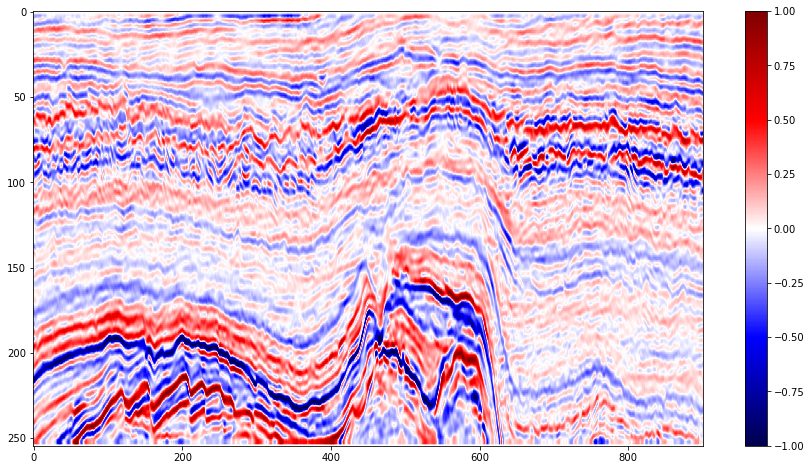

In [18]:
# plotando a inline
plt.figure(figsize=(15,8))
plt.imshow(inline_vol, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

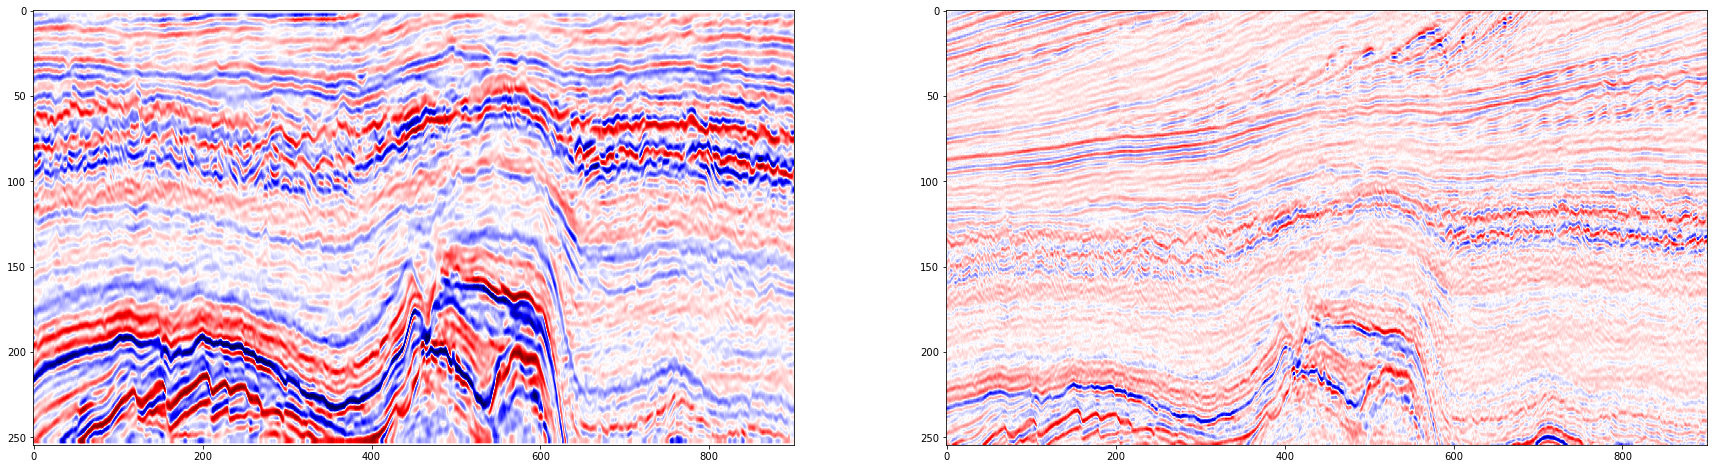

(255, 901)
(255, 901)


In [28]:
# Comparaçõ dos resultados

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(inline_vol, aspect='auto', cmap='seismic')
plt.clim(-1, 1)


plt.subplot(1, 2, 2)
plt.imshow(norm_seismic_tipo3, aspect='auto', cmap='seismic')
plt.clim(-1, 1)

plt.show()

print(inline_vol.shape)
print(norm_seismic_tipo3.shape)

In [ ]:
# plt.clim(-1, 1)

In [20]:
# Realizando a normalização tipo 3 no dado do artigo

norm_artigo_tipo3 = 2 * ((inline_vol - np.min(inline_vol)) / (np.max(inline_vol) - np.min(inline_vol))) - 1

In [29]:
# Realizando a normalização tipo 2 no dado do artigo

p1_, p99_ = np.percentile(inline_vol, (1, 99))

fator_ = max(abs(p1_),abs(p99_))

norm_artigo_tipo2 = inline_vol/fator_

norm_artigo_tipo2 = np.clip(norm_artigo_tipo2, -1, 1)

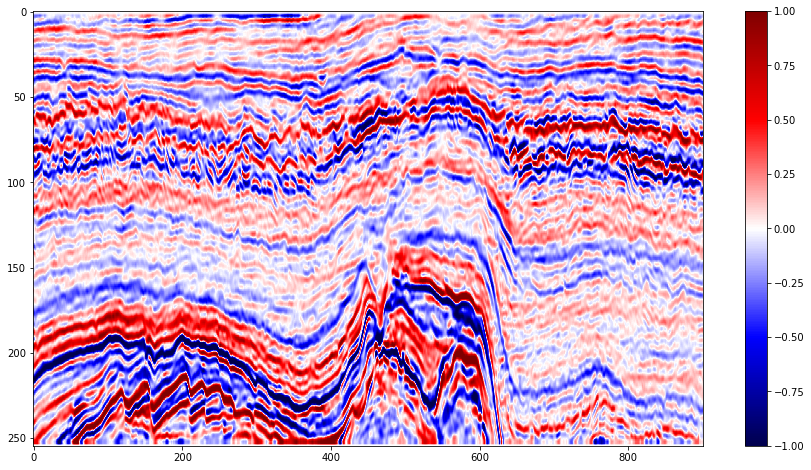

In [30]:
# plotando a inline
plt.figure(figsize=(15,8))
plt.imshow(norm_artigo_tipo2, aspect='auto', cmap='seismic')
plt.clim(-1, 1)
plt.colorbar()
plt.show()

# Comparando os resultados após realizar a normalização em ambos os dados

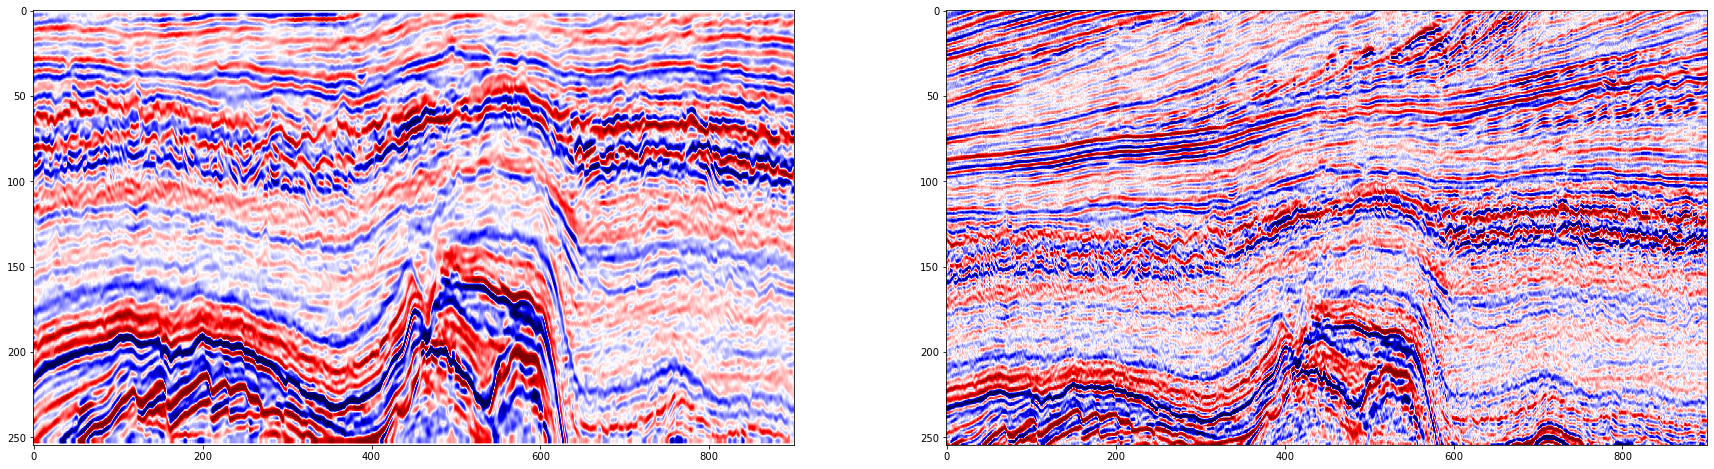

In [31]:
# Comparação dos resultados

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(norm_artigo_tipo2, aspect='auto', cmap='seismic')
plt.clim(-1, 1)


plt.subplot(1, 2, 2)
plt.imshow(norm_seismic_tipo2, aspect='auto', cmap='seismic')
plt.clim(-1, 1)

plt.show()

# Sopreposição da label

In [32]:
# obtendo apenas uma inline do volume de dados da label
inline_vol_label = volume_seismic_label[325:326,:,:]
print(inline_vol_label.shape)

# dando um novo shape para o array inline_vol_label
inline_vol_label = inline_vol_label.reshape(901,255).T
print(inline_vol_label.shape)

(1, 901, 255)
(255, 901)


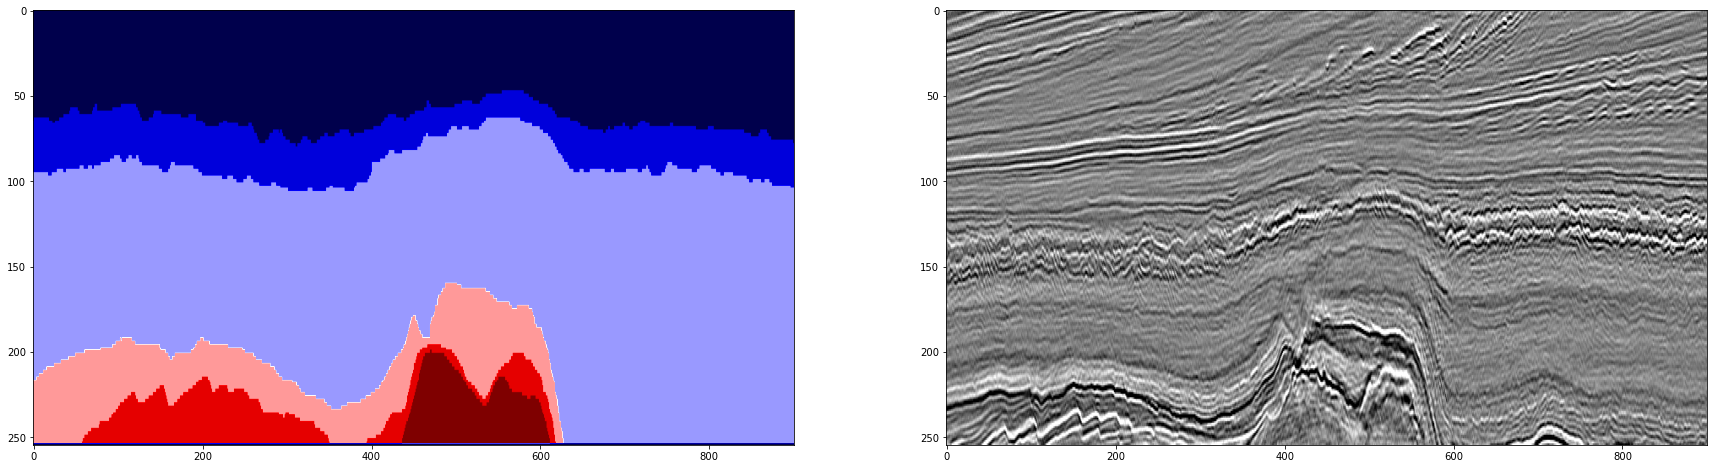

In [44]:
# Comparação dos resultados

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(inline_vol_label, aspect='auto', cmap='seismic')
# plt.clim(-1, 1)


plt.subplot(1, 2, 2)
plt.imshow(norm_seismic_tipo2, aspect='auto', cmap='gray')
# plt.clim(-1, 1)

plt.show()

In [49]:
result2 = norm_seismic_tipo2 + inline_vol_label

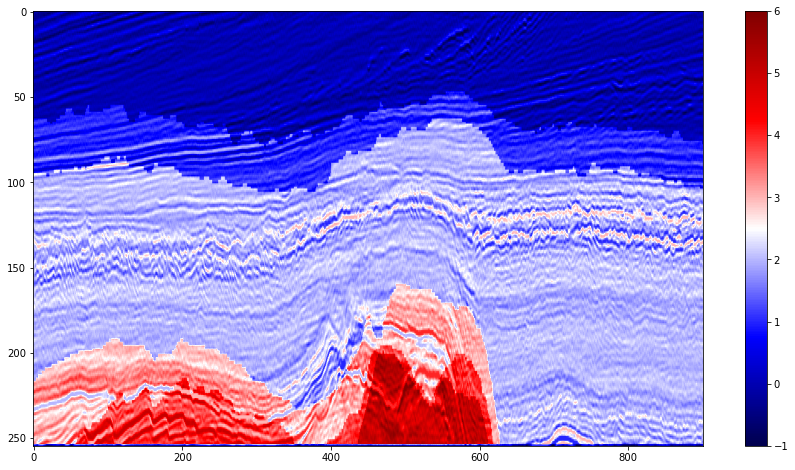

In [52]:
plt.figure(figsize=(15,8))
plt.imshow(result2, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()